In [1]:
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm

In [2]:
p = 1.0/3
n = 10000

In [3]:
def sampleBernoulli(trials, prob):
    return np.sum(np.array(bernoulli.rvs(prob, size = trials))) 

def nSamples(n, trials, prob):
    res = np.zeros(n)
    for i in range(0, n):
        res[i] = sampleBernoulli(trials, prob)
    return res

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

samples = [np.array(nSamples(n, 2**i, p)) for i in range(2, 14)]

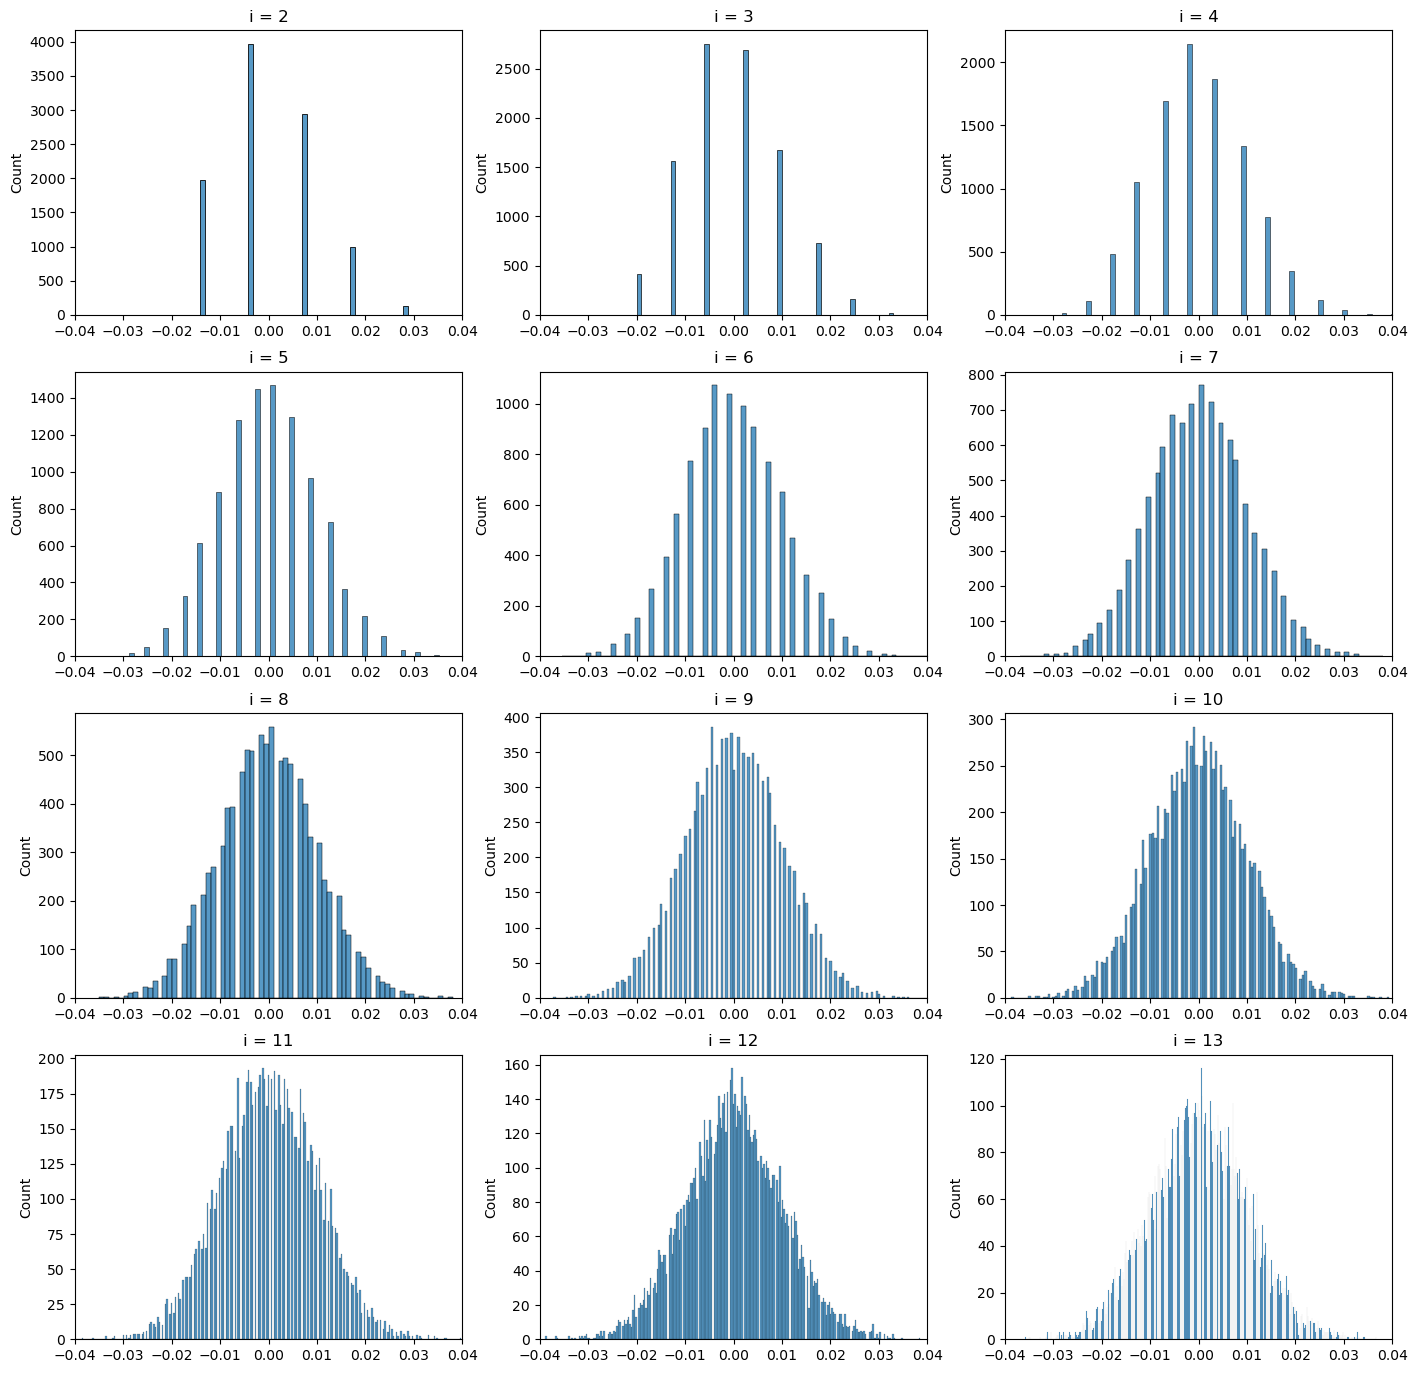

In [24]:
fig, ax = plt.subplots(4, 3) 
fig.set_size_inches(17,17)
binws = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0005, 0.0005, 0.0003, 0.0003, 0.0001]
for i in range(0, 12):
    sigma = binom.std(2**(i+2), p)
    mu = 2**(i+2)*p
    sns.histplot((samples[i] - mu)/(sigma*np.sqrt(n)), ax = ax[i//3, i%3], stat = 'count', binwidth=binws[i])
    ax[i//3, i%3].set_title('i = ' + str(i+2))
    ax[i//3, i%3].set_xlim(-0.04, 0.04)



## Histograms of $\frac{S_i - 2^i/3}{\sqrt{n}\sigma}$

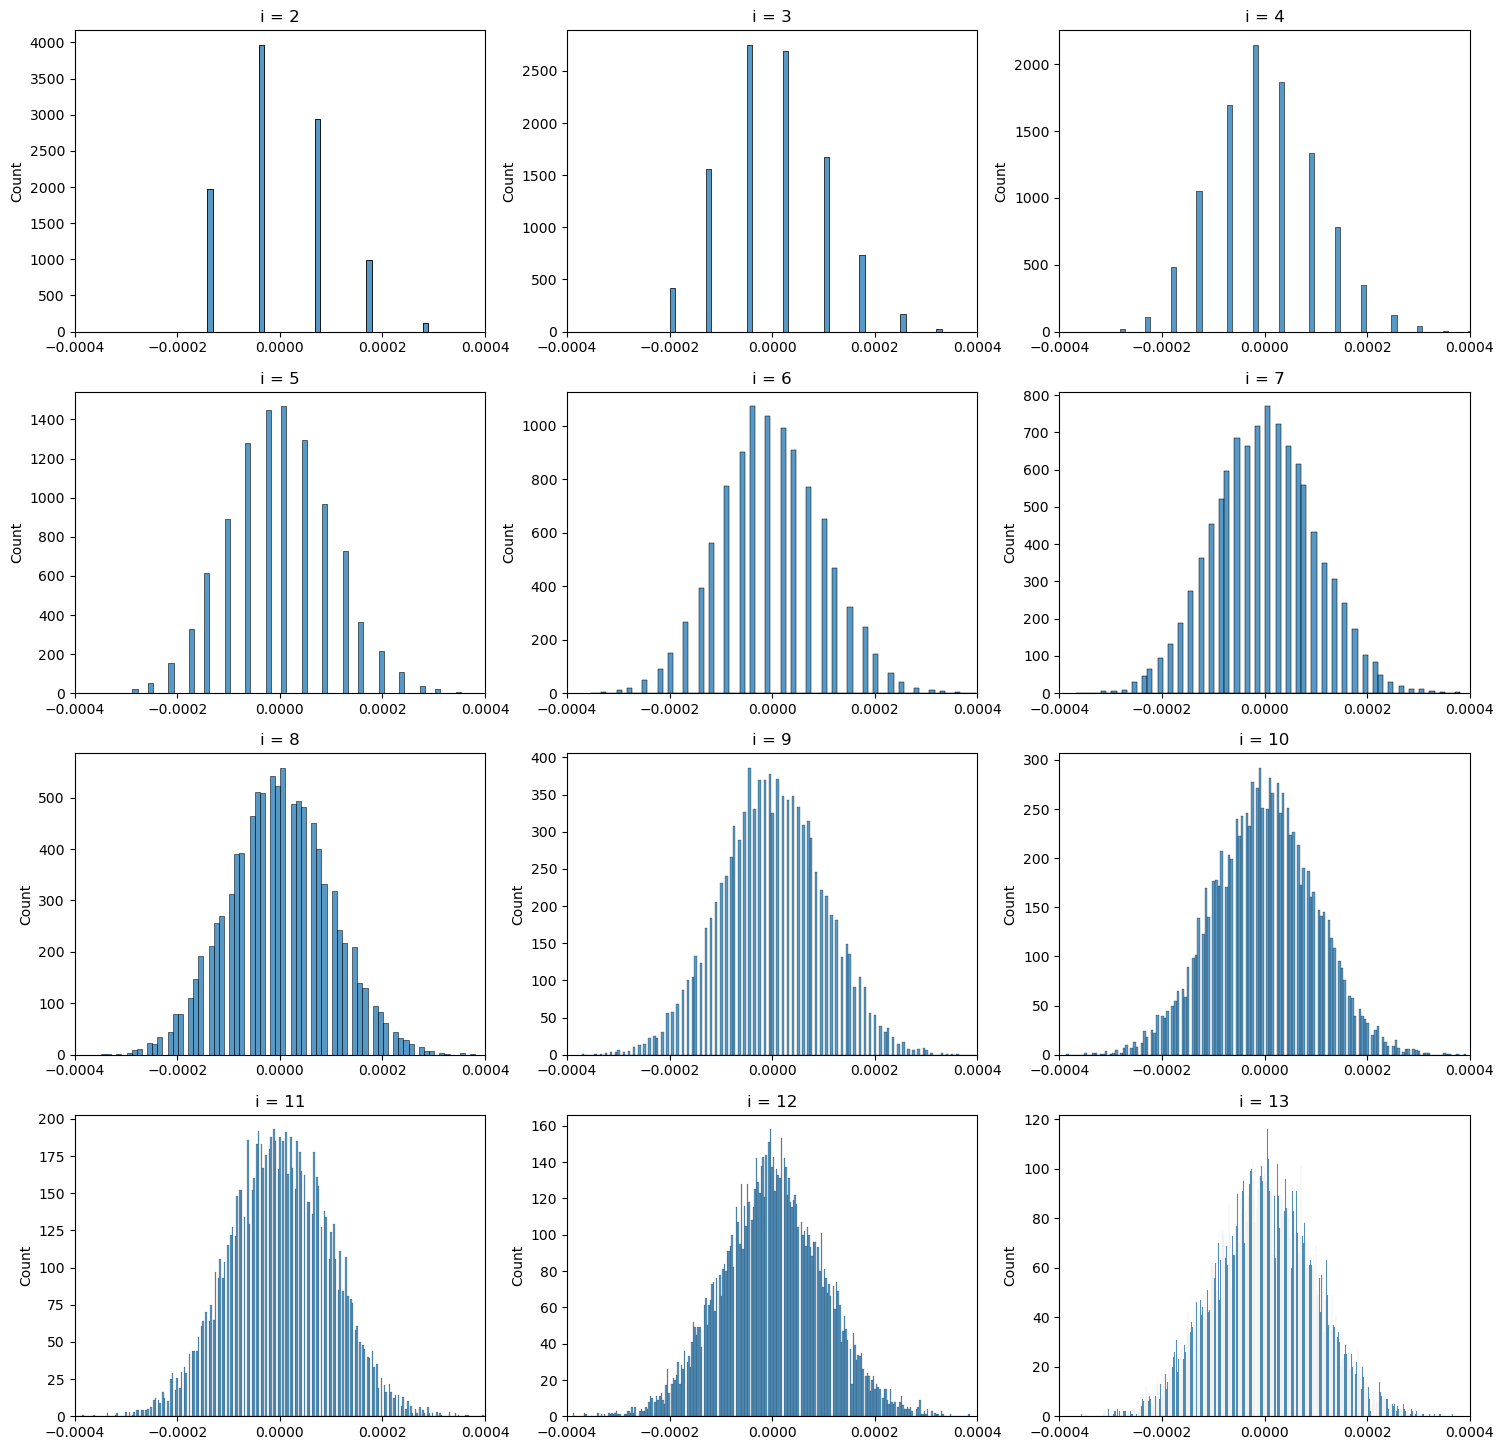

In [25]:
fig, ax = plt.subplots(4, 3) 
fig.set_size_inches(18,18)

binws = [bin * (1/np.sqrt(n)) for bin in binws]

for i in range(0, 12):
    sigma = binom.std(2**(i+2), p)
    mu= 2**(i+2)*p
    sns.histplot((samples[i] - mu)/(sigma*n), ax = ax[i//3, i%3], stat = 'count', binwidth=binws[i])
    ax[i//3, i%3].set_title('i = ' + str(i+2))
    ax[i//3, i%3].set_xlim(-0.0004, 0.0004)
    ax[i//3, i%3].set_xticks(np.arange(-0.0004, 0.00041, 0.0002))
    

## Histograms of $\frac{S_i - 2^i/3}{n\sigma}$

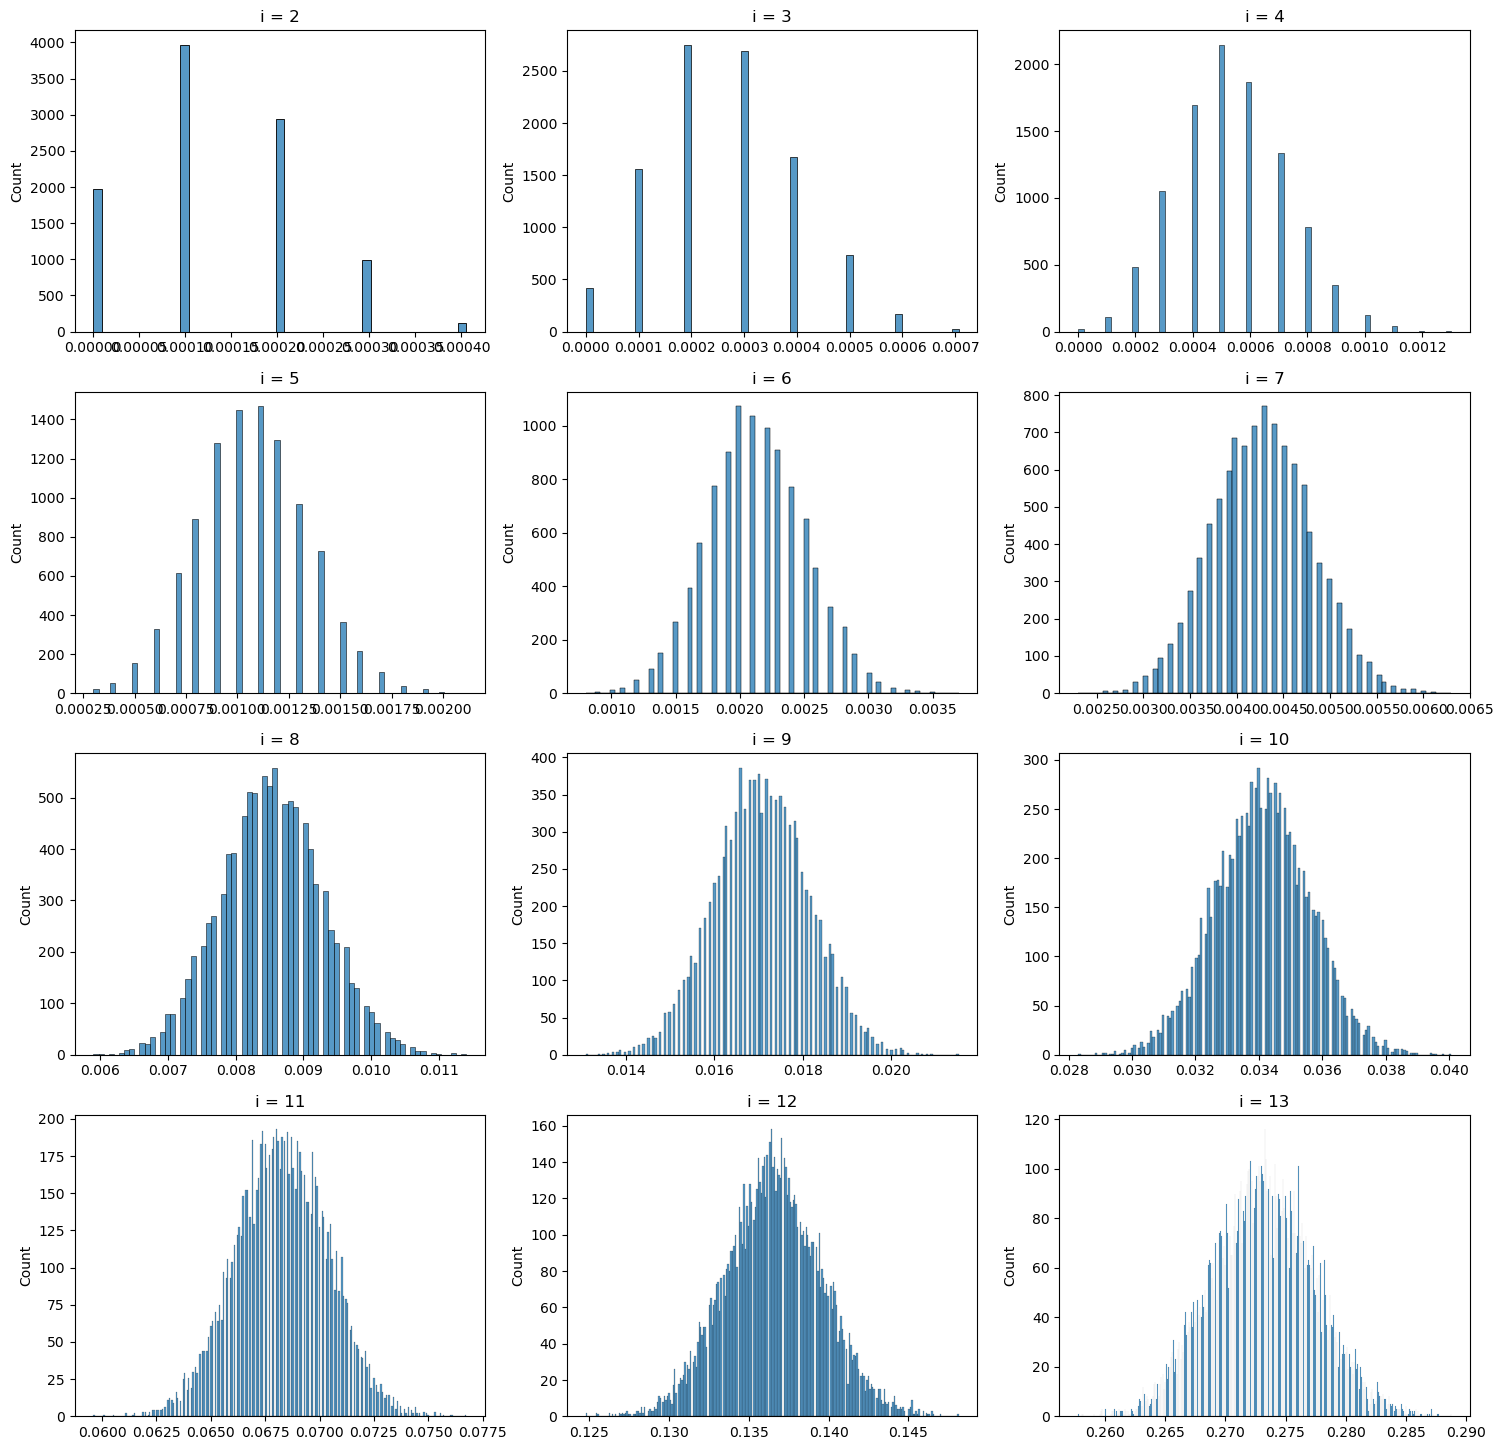

In [26]:
fig, ax = plt.subplots(4, 3) 
fig.set_size_inches(18,18)

for i in range(0, 12):
    sigma = binom.std(2**(i+2), p)
    mu= 2**(i+2)*p
    sns.histplot((samples[i])/n, ax = ax[i//3, i%3], stat = 'count', binwidth=binws[i]*sigma)
    ax[i//3, i%3].set_title('i = ' + str(i+2))

## Histograms of $\frac{S_i}{n}$

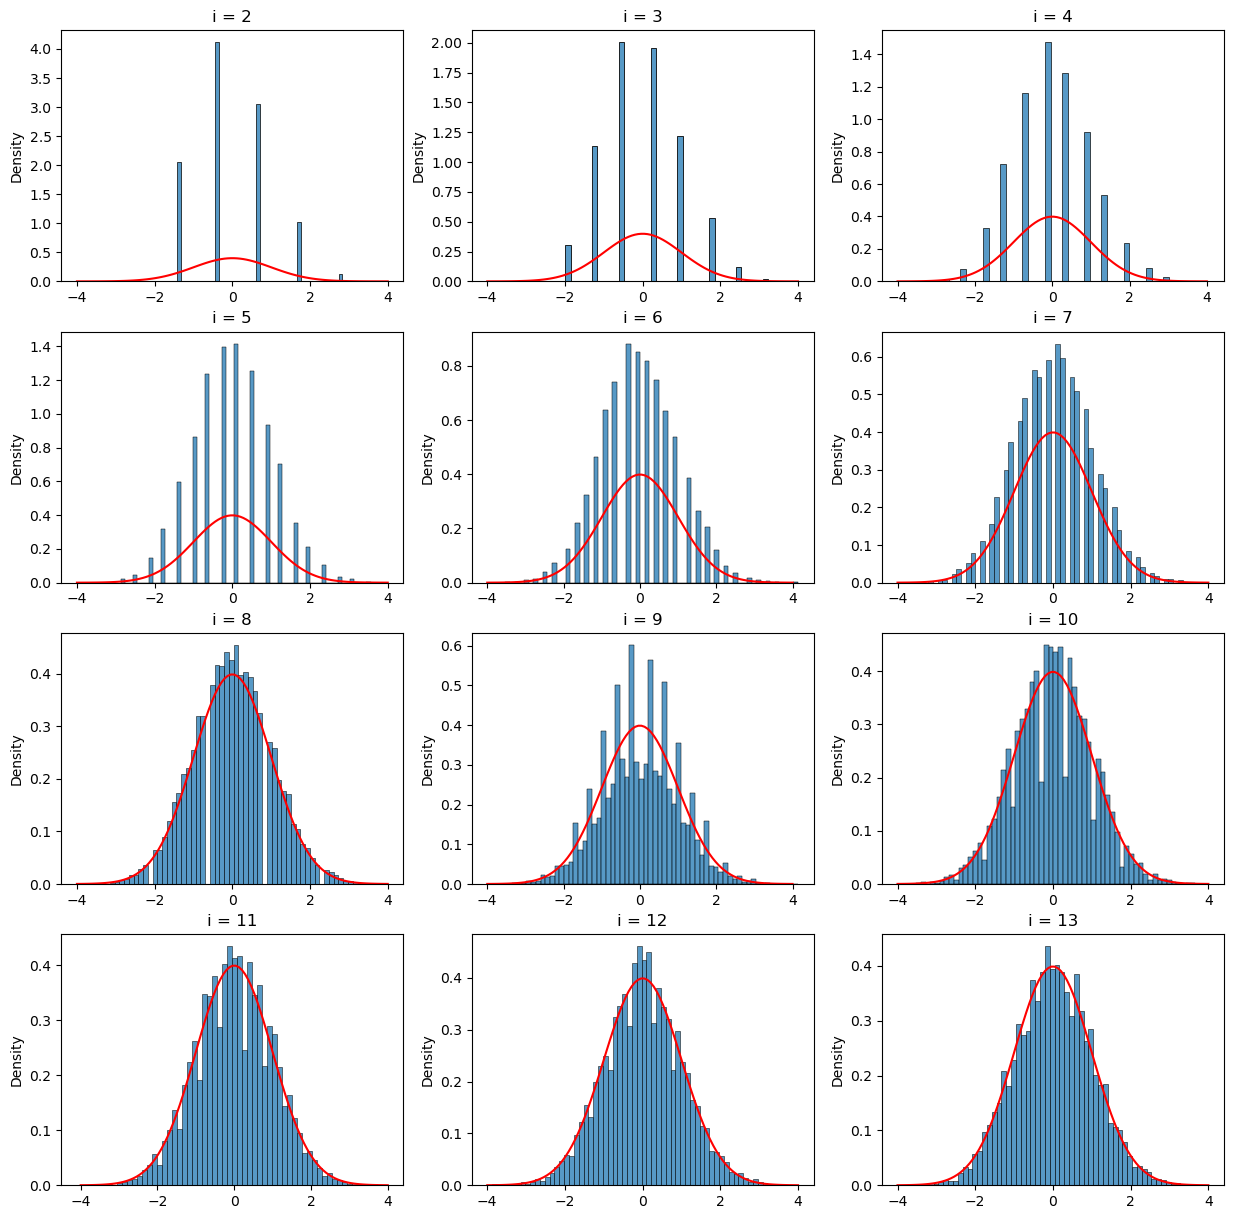

In [27]:
fig, ax = plt.subplots(4, 3) 
fig.set_size_inches(15,15)

for i in range(0, 12):
    sigma = np.std(samples[i])
    mu= 2**(i+2)*p
    sns.histplot((samples[i] - mu)/(sigma), ax = ax[i//3, i%3], stat = 'density')
    ax[i//3, i%3].set_title('i = ' + str(i+2))
    


x = np.linspace(-4, 4, 100)
y = norm.pdf(x, 0, 1)
for i in range(0, 12):
    ax[i//3, i%3].plot(x, y, color = 'red')



## Histograms of $\frac{S_i - 2^i/3}{\sigma}$ with $\mathcal{N}(0, 1)$

Let P be the sum of 70 independent samples from Pareto distribution with parameter α = 1. Generate P 800 times and plot a histogram. Explain its shape. Repeat this experiment for α = 6.

<AxesSubplot:ylabel='Count'>

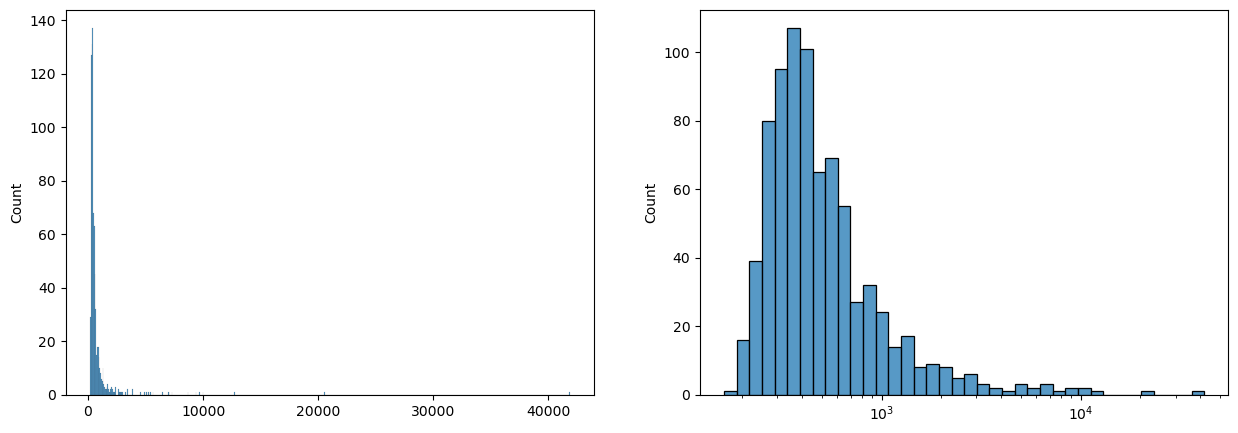

In [9]:
from scipy.stats import pareto

sample = [np.sum(np.array(pareto.rvs(1, size = 70))) for i in range(0, 800)]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,5)
sns.histplot(sample, ax = ax[0], stat = 'count')
sns.histplot(sample, ax = ax[1], stat = 'count', log_scale = True)

<AxesSubplot:ylabel='Count'>

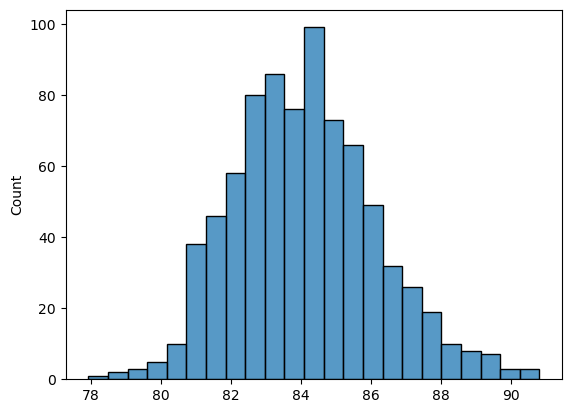

In [10]:
sample = [np.sum(np.array(pareto.rvs(6, size = 70))) for i in range(0, 800)]

sns.histplot(sample, stat = 'count')

Text(0.5, 1.0, 'Pareto, alpha = 1')

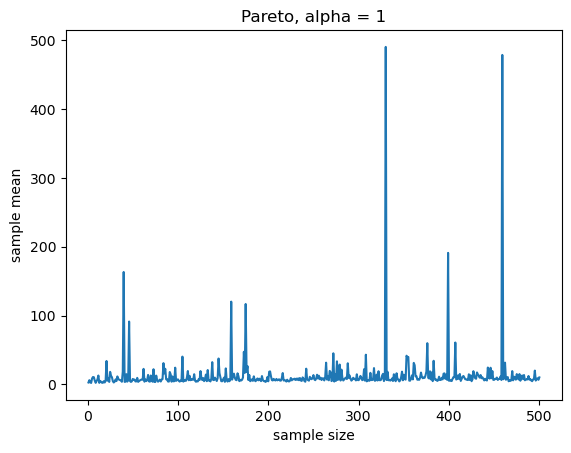

In [11]:
sample_mean = [np.mean(pareto.rvs(1, size = s)) for s in range(1, 501)]
# plot the sample mean
plt.plot(range(1, 501), sample_mean)
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.title("Pareto, alpha = 1")

Text(0.5, 1.0, 'Pareto, alpha = 10')

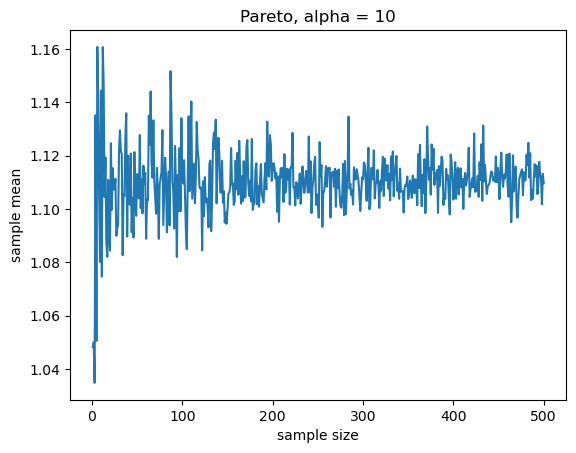

In [12]:
sample_mean = [np.mean(pareto.rvs(10, size = s)) for s in range(1, 501)]
# plot the sample mean
plt.plot(range(1, 501), sample_mean)
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.title("Pareto, alpha = 10")

In [13]:
with open('sample1.txt') as f:
    sample1 = f.read().splitlines()
sample1 = [i.split() for i in sample1]
sample1 = [int(i) for j in sample1 for i in j]
print("p = ", np.sum(sample1)/len(sample1))


p =  0.128


In [14]:
with open('sample2.txt') as f:
    sample2 = f.read().splitlines()
sample2 = [i.split() for i in sample2]
sample2 = [float(i) for j in sample2 for i in j]

print("mu = ", np.mean(sample2))
print("sigma = ", np.std(sample2))

mu =  -0.05953748457356813
sigma =  2.0009003551705273
